In [35]:
for i in xrange(1, 10, 2):
    print(i)

NameError: name 'xrange' is not defined

In [37]:
np.xrange(1,10000)

AttributeError: module 'numpy' has no attribute 'xrange'

In [39]:
from mlxtend.evaluate import bias_variance_decomp


KeyboardInterrupt: 

In [85]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn.tree import DecisionTreeClassifier
from mlxtend.data import iris_data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

X, y = iris_data()
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True,
                                                    stratify=y)



tree1 = DecisionTreeClassifier(random_state=123)
tree1.fit(X_train,y_train)

pred = tree1.predict(X_test)

print(accuracy_score(y_test, pred))
print(accuracy_score(y_train, y_train))


# avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
#         tree1, X_train, y_train, X_test, y_test, 
#         loss='0-1_loss',
#         random_seed=123)

# print('Average expected loss: %.3f' % avg_expected_loss)
# print('Average bias: %.3f' % avg_bias)
# print('Average variance: %.3f' % avg_var)

0.8666666666666667
1.0


### post Pruning

In [90]:
ccp_= tree1.cost_complexity_pruning_path(X_train,y_train)['ccp_alphas']

In [96]:
test_ = []
train_ = []

for al in ccp_:
    tree2 = DecisionTreeClassifier(ccp_alpha=al,random_state=123)
    tree2.fit(X_train,y_train)

    pred = tree2.predict(X_test)

    test_.append(accuracy_score(y_test, pred))
    train_.append(accuracy_score(y_train, y_train))
    
print(test_)
print(train_)
print(ccp_)

[0.8666666666666667, 0.8666666666666667, 0.9111111111111111, 0.9333333333333333, 0.6666666666666666, 0.3333333333333333]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.         0.00615079 0.01702864 0.01847042 0.26235326 0.33333333]


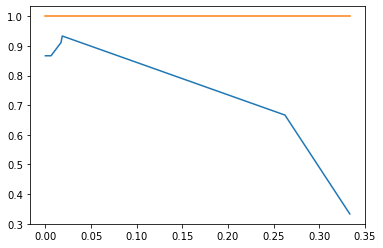

In [94]:
plt.plot(ccp_, test_)
plt.plot(ccp_, train_)

In [98]:
# best ccp is 0.01847042

tree3 = DecisionTreeClassifier(ccp_alpha=0.1847042,  random_state=123)
tree3.fit(X_train,y_train)

pred = tree3.predict(X_test)

print(accuracy_score(y_test, pred))
print(accuracy_score(y_train, y_train))

0.9333333333333333
1.0


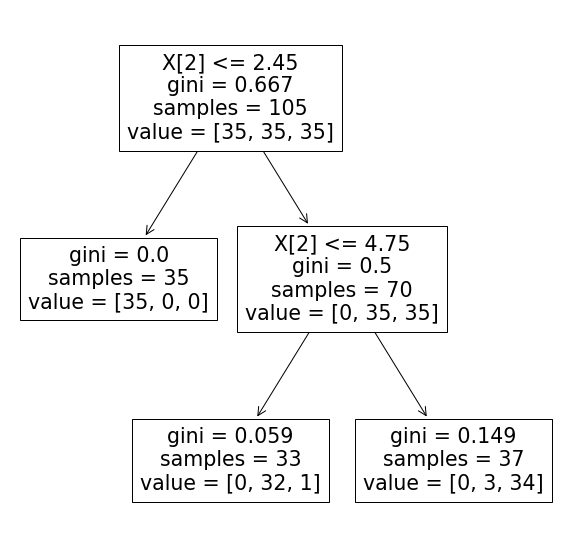

In [108]:
plt.figure(figsize = (10,10))
tree.plot_tree(tree3)
plt.show()

In [70]:
X.shape

(150, 4)

In [113]:
tree3.get_params()

{'ccp_alpha': 0.1847042,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 123,
 'splitter': 'best'}